## SME0130 - Complex Networks
### Classification of Complex Networks

Carolina Spera Braga

In [1]:
# Libraries used
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import random

In [2]:
# Definition of the measures function
def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    N = len(G)
    M = G.number_of_edges()
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1,k2,variance,av_cl,l,r

## 1. Biological Networks

### 1.1. Protein Pairs
This network represents pairs of interacting proteins in humans (Homo sapiens).

Número de nós: 2217
Número de arestas: 6418
Classe: BA


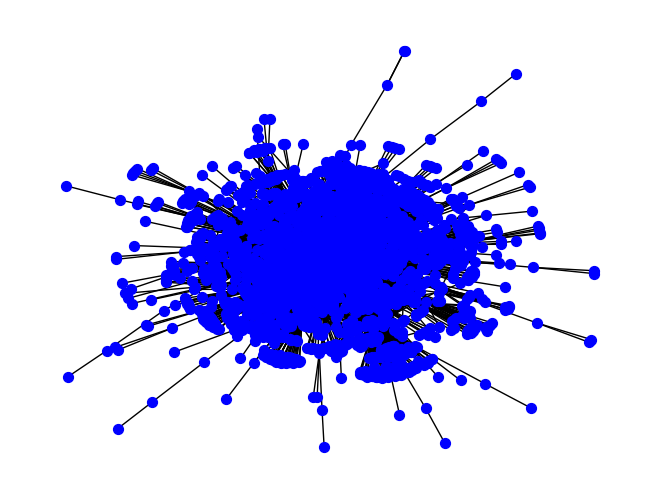

In [3]:
# Reading the network with the read_edgelist function.
G = nx.read_edgelist("RB - maayan-figeys human proteins/out.maayan-figeys", 
                    nodetype=int, data=(('weight',float),))

# We transform the network to the undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# We consider the largest component of the network
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# We convert the labels to integers to simplify the implementation
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Network plot
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# We calculate first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient with the measures function
k1, k2, variance, av_cl, l, r = measures(G)
X_net = [k1, k2, variance, av_cl, l, r]

# Network models:
cl = ['ER', 'WS', 'BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree / (N - 1)
for i in range(0, n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GER)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1  # probability of rewiring
for i in range(0, n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GWS)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree / 2)
for i in range(0, n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GBA)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(2.0)

# We convert the lists to arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1, len(X_net)) 

# We normalize the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# We fit the Logistic Regression model
model = linear_model.LogisticRegression(C=1e6)
model.fit(X, y)

# Class prediction for the network
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Barabási-Albert.

### 1.2. Gene Fusion
This is a gene fusion network. The nodes represent genes, and two nodes are connected if it is observed that the two genes fused during the onset of cancer.

Número de nós: 110
Número de arestas: 124
Classe: BA


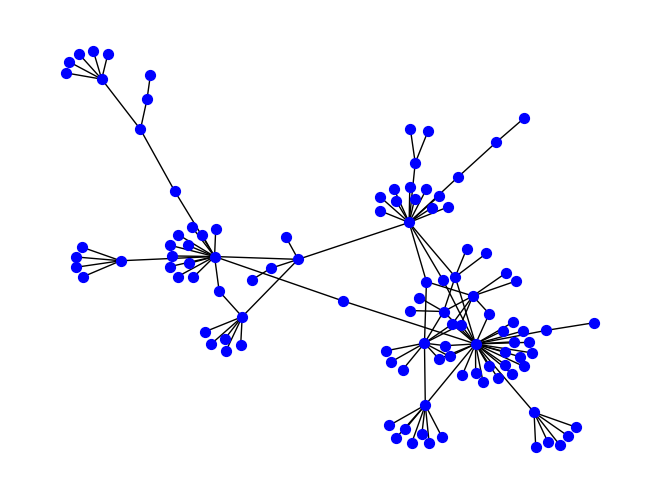

In [4]:
# Reading the network with the read_edgelist function.
G = nx.read_edgelist("RB gene_fusion/out.gene_fusion", 
                    nodetype=int, data=(('weight',float),))

# Convert the network to an undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Consider the largest component of the network
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Convert node labels to integers to ease implementation
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plot the network
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# Calculate the first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient with the measures function
k1,k2,variance,av_cl,l,r = measures(G)
X_net = [k1,k2,variance,av_cl,l,r]

# Network models:
cl = ['ER','WS','BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree/(N-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1 # probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GBA)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(2.0)

# Convert the lists to arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 

# Normalize the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# Fit the Logistic Regression model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predict the class for the network
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Barabási-Albert.

### 1.3. PDZBase
This is a protein-protein interaction network from PDZBase.

Número de nós: 161
Número de arestas: 209
Classe: BA


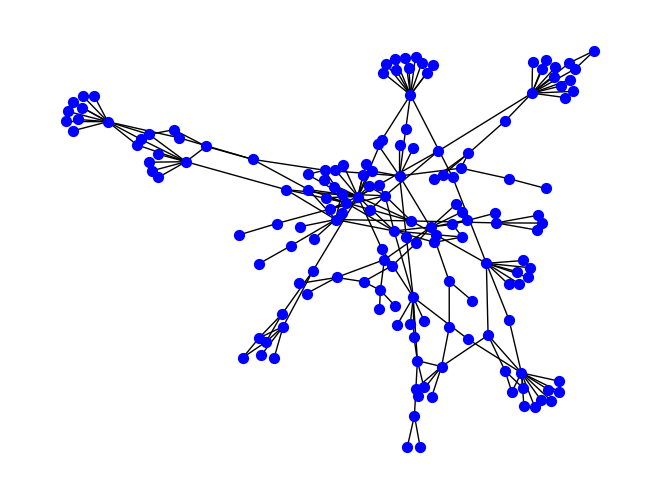

In [5]:
# Reading the network using the read_edgelist function.
G = nx.read_edgelist("RB maayan-pdzbase/out.maayan-pdzbase",
                     nodetype=int, data=(('weight',float),))

# Transform the network to the undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Consider the largest connected component of the network.
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Convert node labels to integers to facilitate implementation.
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges.
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plot the network.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# Calculate first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient using the measures function.
k1,k2,variance,av_cl,l,r = measures(G)
X_net = [k1,k2,variance,av_cl,l,r]

# Network models:
cl = ['ER','WS','BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree/(N-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GBA)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(2.0)
    
# Transform the lists into arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 

# Normalize the data.
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# Fit the Logistic Regression model.
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predict the class for the network.
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Barabási-Albert.

## 2. Social Networks

### 2.1. Jazz
This is the jazz musician collaboration network. Each node represents a jazz musician, and the edges denote that two musicians played together in a band. The data was collected in 2003.

Número de nós: 198
Número de arestas: 2742
Classe: BA


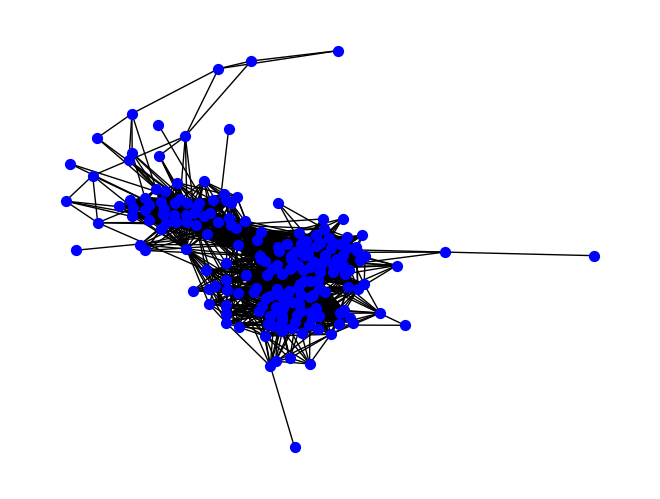

In [6]:
# Reading the network using the read_edgelist function.
G = nx.read_edgelist("RS - arenas-jazz/out.arenas-jazz", 
                    nodetype=int, data=(('weight',float),))

# Transforming the network to an undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Considering the largest component of the network.
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Converting labels to integers to facilitate implementation.
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges.
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plotting the network.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# Calculating first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient using the measures function.
k1,k2,variance,av_cl,l,r = measures(G)
X_net = [k1,k2,variance,av_cl,l,r]

# Network models:
cl = ['ER','WS','BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree/(N-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GBA)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(2.0)

# Converting lists into arrays.    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 

# Normalizing the data.
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# Fitting the Logistic Regression model.
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predicting the class for the network.
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Barabási-Albert.

### 2.2. HIV
This is a network of sexual contacts between individuals involved in the early spread of the human immunodeficiency virus (HIV) in the United States of America (USA). This network is the origin of the phrase "patient zero," referring to a person from whom an infection initially spreads.

Número de nós: 40
Número de arestas: 41
Classe: ER


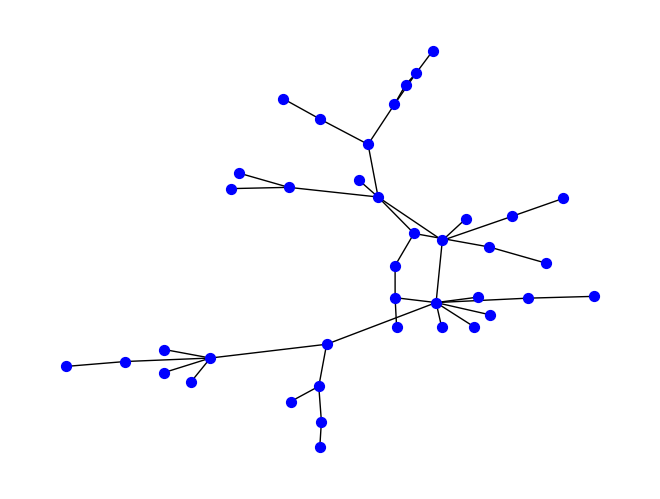

In [7]:
# Reading the network with the read_edgelist function.
G = nx.read_edgelist("RS hiv/out.hiv", 
                    nodetype=int, data=(('weight',float),))

# Transforming the network to an undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Considering the largest component of the network
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Converting labels to integers for easier implementation
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plotting the network
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# Calculating first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient with the measures function
k1, k2, variance, av_cl, l, r = measures(G)
X_net = [k1, k2, variance, av_cl, l, r]

# Network models:
cl = ['ER','WS','BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree / (N - 1)
for i in range(0, n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GER)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1 # rewiring probability
for i in range(0, n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GWS)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree / 2)
for i in range(0, n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GBA)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(2.0)

# Transforming the lists into arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1, len(X_net)) 

# Normalizing the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# Fitting the Logistic Regression model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predicting the class for the network
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Erdos-Renyi.

### 2.3. INFECTIOUS Exhibition
This network describes the face-to-face behavior of people during the INFECTIOUS: STAY AWAY exhibition in 2009 at the Science Gallery in Dublin. The nodes represent the visitors of the exhibition; the edges represent face-to-face contacts that lasted for at least 20 seconds. Multiple edges between two nodes are possible and denote multiple interactions. The network contains data from the day with the most interactions.

Número de nós: 410
Número de arestas: 2765
Classe: WS


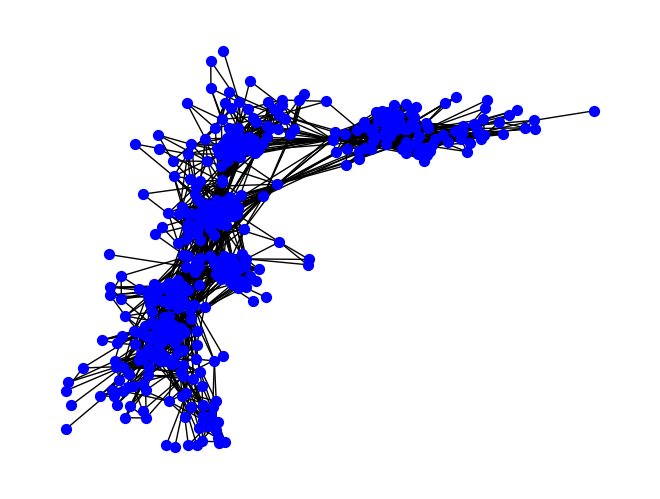

In [8]:
# Reading the first 2 columns of the file out.sociopatterns-infectious
G = np.loadtxt('RS sociopatterns-infectious/out.sociopatterns-infectious',
               dtype=str, usecols=(0,1))

# Saving G in a new file out.sociopatterns-infectious_2col
with open("RS sociopatterns-infectious/out.sociopatterns-infectious_2col", "w") as txt_file:
    for line in G:
        txt_file.write(" ".join(line) + "\n")

# Reading the generated file, out.sociopatterns-infectious_2col
G = nx.read_edgelist("RS sociopatterns-infectious/out.sociopatterns-infectious_2col",
                     nodetype=int, data=(('weight',float),))

# Transforming the network to the undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Considering the largest component of the network
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Converting labels to integers to ease implementation
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plotting the network
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# Calculating first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient using the measures function
k1, k2, variance, av_cl, l, r = measures(G)
X_net = [k1, k2, variance, av_cl, l, r]

# Network models:
cl = ['ER', 'WS', 'BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree / (N - 1)
for i in range(0, n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GER)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1  # probability of rewiring
for i in range(0, n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GWS)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree / 2)
for i in range(0, n_nets):
    GBA = nx.barabasi_albert_graph(N, m)
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GBA)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(2.0)

# Transforming the lists into arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1, len(X_net)) 

# Normalizing the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# Fitting the Logistic Regression model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predicting the class for the network
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Small World.

## 3. Technological Networks

### 3.1. Wikipedia Creek

This is the bipartite editing network of Wikipedia Creek. It contains users and pages of Wikipedia Creek, connected by editing events. Each edge represents an edit. The dataset includes the timestamp of each edit.

Número de nós: 105
Número de arestas: 145
Classe: BA


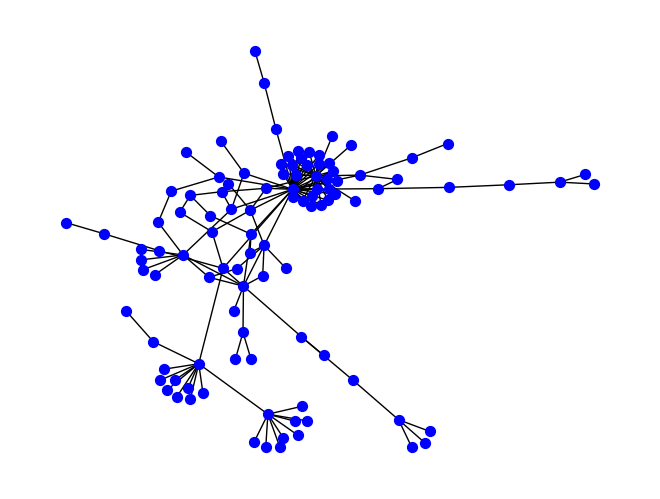

In [9]:
# Reading the first 2 columns of the file out.edit-muswiki
G = np.loadtxt('RT edit-muswiki/out.edit-muswiki',
               dtype=str, usecols=(0,1))

# Saving G in a new file out.edit-muswiki_2col
with open("RT edit-muswiki/out.edit-muswiki_2col", "w") as txt_file:
    for line in G:
        txt_file.write(" ".join(line) + "\n")

# Reading the generated file, out.edit-muswiki_2col
G = nx.read_edgelist("RT edit-muswiki/out.edit-muswiki_2col",
                     nodetype=int, data=(('weight',float),))

# Transforming the network to the undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Considering the largest component of the network
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Converting labels to integers to simplify implementation
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plotting the network
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# Calculating first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient with the function measures
k1, k2, variance, av_cl, l, r = measures(G)
X_net = [k1, k2, variance, av_cl, l, r]

# Network models:
cl = ['ER', 'WS', 'BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree / (N - 1)
for i in range(0, n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GER)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1  # probability of rewiring
for i in range(0, n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GWS)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree / 2)
for i in range(0, n_nets):
    GBA = nx.barabasi_albert_graph(N, m)
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GBA)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(2.0)

# Transforming the lists into arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1, len(X_net))

# Normalizing the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# Fitting the Logistic Regression model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predicting the class for the network
y_pred = model.predict(X_net)
print('Class:', cl[int(y_pred)])c

Through logistic regression, we classified the network as Barabási-Albert.

### 3.2. DBpedia Similarity

This is the DBpedia similarity graph. It contains the "similar to" links between DBpedia pages. The network is undirected and does not contain multiple edges. The "similar to" relationship was removed from DBpedia in a specific version. Therefore, this dataset will not be updated with new versions of DBpedia. The edges correspond to the relationship type <http://dbpedia.org/property/similar> in DBpedia.

Número de nós: 107
Número de arestas: 167
Classe: ER


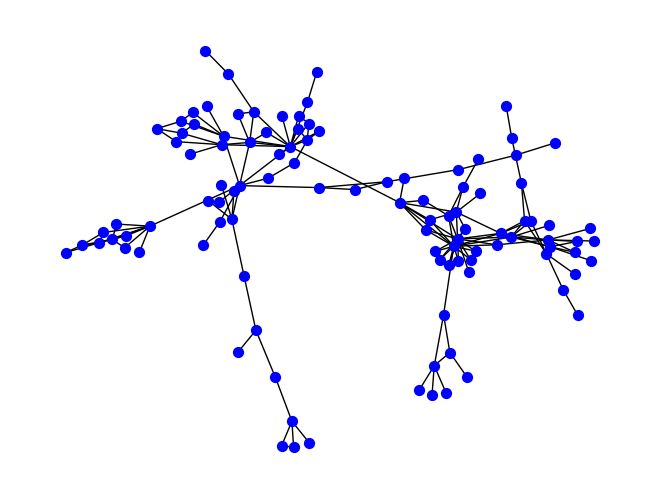

In [10]:
# Reading the network with the read_edgelist function.
G = nx.read_edgelist("RT dbpedia-similar/out.dbpedia-similar",
                     nodetype=int, data=(('weight',float),))

# We convert the network to the undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# We consider the largest component of the network.
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# We convert the labels to integers for easier implementation.
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plotting the network
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# We calculate the first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient using the measures function.
k1,k2,variance,av_cl,l,r = measures(G)
X_net = [k1,k2,variance,av_cl,l,r]

# Network models:
cl = ['ER','WS','BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree/(N-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GBA)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(2.0)

# We convert the lists to arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 

# We normalize the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# We fit the Logistic Regression model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predict the class for the network
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Erdos-Renyi.

### 3.3. Bitcoin Alpha
This is a user-to-user trust/distrust network from the Bitcoin Alpha platform, where Bitcoins are traded. Each directed edge represents trust or distrust on a scale from -10 to +10. Positive edge weights denote trust, and negative edge weights denote distrust. An edge weight of zero does not appear.

Número de nós: 3775
Número de arestas: 14120
Classe: BA


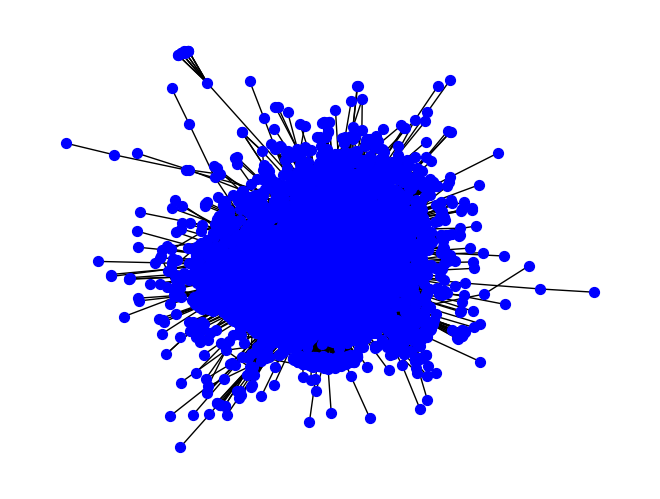

In [11]:
# Reading the first 2 columns from the out.soc-sign-bitcoinalpha file
G = np.loadtxt('RT soc-sign-bitcoinalpha/out.soc-sign-bitcoinalpha',
               dtype=str, usecols=(0,1))

# Saving G to a new file out.soc-sign-bitcoinalpha_2col
with open("RT soc-sign-bitcoinalpha/out.soc-sign-bitcoinalpha_2col", "w") as txt_file:
    for line in G:
        txt_file.write(" ".join(line) + "\n")

# Reading the generated file, out.soc-sign-bitcoinalpha_2col
G = nx.read_edgelist("RT soc-sign-bitcoinalpha/out.soc-sign-bitcoinalpha_2col",
                     nodetype=int, data=(('weight',float),))

# Transforming the network to an undirected version.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Considering the largest connected component of the network
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Converting the labels to integers for easier implementation
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Number of nodes and edges
N = len(G) 
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

# Plotting the network
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

# Calculating the first moment, second moment, variance, average_clustering,
# average_shortest_path_length, and degree_assortativity_coefficient using the measures function
k1, k2, variance, av_cl, l, r = measures(G)
X_net = [k1, k2, variance, av_cl, l, r]

# Network models:
cl = ['ER', 'WS', 'BA']
random.seed(2)
# Erdos-Renyi network (ER)
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree / (N - 1)
for i in range(0, n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GER)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(0.0)

# Small world networks (WS)
k = int(av_degree)
p = 0.1  # Probability of rewiring
for i in range(0, n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GWS)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(1.0)

# Barabási-Albert network (BA)
m = int(av_degree / 2)
for i in range(0, n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1, k2, variance, av_cl, l, r = measures(GBA)
    x = [k1, k2, variance, av_cl, l, r]
    X.append(x)
    y.append(2.0)

# Converting the lists into arrays    
X = np.array(X)
y = np.array(y)
X_net = np.array(X_net)
X_net = X_net.reshape(1, len(X_net))

# Normalizing the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_net = scaler.transform(X_net)

# Fitting the Logistic Regression model
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)

# Predicting the class for the network
y_pred = model.predict(X_net) 
print('Class:', cl[int(y_pred)])

Through logistic regression, we classified the network as Barabási-Albert.

## Hypothesis: Networks of the same type follow the same model.

Do networks of the same type follow the same model?

- **Biological networks**: In this case, all networks were classified as Barabási-Albert, indicating a tendency for biological networks to follow this model.

- **Social networks**: In this case, we obtained one network classified as Small World, one as Barabási-Albert, and one as Erdos-Renyi, so we cannot confirm that social networks follow the same model.

- **Technological networks**: In this case, we obtained one network classified as Erdos-Renyi and two networks classified as Barabási-Albert, so we cannot confirm that technological networks follow the same model.

The random networks used to obtain the results above were generated with a seed of random.seed(2). If we use a different seed, we get different results. For example, with a different seed than 2, we obtained three different classifications for the three biological networks, indicating that there is no standard model for biological networks. It is worth mentioning that small networks with a limited number of nodes and edges were used due to current computational power, and the size of the networks may also influence the classification.

In the case of social networks, when changing the seed, we noticed a tendency toward the Small World model. The fact that we have more Small World models for social networks exemplifies the "six degrees of separation" principle, which suggests that we are all connected by short chains, a fundamental concept in social networks.

Technological networks also showed variations depending on the seed, so we cannot affirm that there is a model to be followed for these networks. 